In [1]:
import numpy as np
from cleanplots import *

In [2]:
import sys 
sys.path.append('/home/lakabuli/workspace/LenslessInfoDesign/EncodingInformation/lensless_imager/')
from lensless_helpers import confidence_interval_list

In [3]:
reconstruction_dir = '/home/lakabuli/workspace/LenslessInfoDesign/design_IDEAL/data/reconstructions/'
figure_folder = '/home/lakabuli/workspace/LenslessInfoDesign/figures/'

## Reconstruction Results Load

In [4]:
seed_list = [4, 42, 31, 50, 77]
model_type_list = ['medium']
lr_list = [5e-3, 2e-3]
dataset_list = ['cifar10', 'fashion_mnist', 'mnist', 'bead_0.02']
max_epochs = 200 

psf_names_list = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
ideal_names_list = ['ideal_cifar', 'ideal_fashion', 'ideal_mnist', 'ideal_beads']
heuristic_ideal_names_list = ['ideal_heuristic_cifar', 'ideal_heuristic_fashion', 'ideal_heuristic_mnist', 'ideal_heuristic_beads']

batch_size = 64
num_lenses_in_ideal_designs = [1, 4, 8, 4] # CIFAR, Fashion, MNIST, Bead
num_lenses_in_heuristic_ideal_designs = [1, 4, 8, 5] # CIFAR, Fashion, MNIST, Bead
num_lenslets = list(range(1, 10))

# Select model parameters
lr_value = lr_list[1]  # 2e-3 better performance
model_type = model_type_list[0]

In [5]:
random_init_optimum_symbol = 'D'
random_init_optimum_symbol_size = 90
heuristic_init_optimum_symbol = '*'
heuristic_init_optimum_symbol_size = 190
best_heuristic_init_symbol_size = 70
random_init_symbol = 'x'
random_init_symbol_size = 100

mnist_color = get_color_cycle()[2] 
fashion_color = get_color_cycle()[1]
cifar_color = get_color_cycle()[0]
bead_color = get_color_cycle()[6]

colors_to_use = [cifar_color, fashion_color, mnist_color, bead_color]

axis_label_fontsize = 21
title_fontsize = 23
tick_fontsize = 19
legend_fontsize = 16

dataset_names_nice = ['CIFAR10', 'Fashion-MNIST', 'MNIST', 'Bead']

### Figure 3e plot

dataset cifar10 mean PSNRS are:  [16.506342 16.374134 16.457478 16.161158 15.870962 15.981326 15.849208
 15.913338 15.79153  16.555943]
dataset cifar10 mean MSES are:  [0.02237011 0.02305321 0.02261534 0.02421426 0.02588652 0.02523662
 0.0260149  0.02563445 0.02636387 0.02211065]
dataset fashion_mnist mean PSNRS are:  [19.478512 20.032616 20.291786 19.93265  19.66567  19.586805 19.538897
 19.525173 19.428661 20.4473  ]
dataset fashion_mnist mean MSES are:  [0.01128816 0.0099369  0.00936298 0.01017    0.01081091 0.01101168
 0.01113141 0.01116619 0.01142096 0.00903297]
dataset mnist mean PSNRS are:  [19.192768 20.778944 22.504322 23.3021   24.46228  24.005272 23.572018
 23.352825 23.088318 24.901682]
dataset mnist mean MSES are:  [0.01205582 0.008368   0.00562914 0.0046825  0.00358543 0.00398374
 0.00440242 0.00463291 0.00491934 0.00324049]
dataset bead_0.02 mean PSNRS are:  [27.17573  27.80893  28.146591 27.674423 27.462366 27.467804 27.375416
 27.343801 27.329361 28.545654]
dataset bea

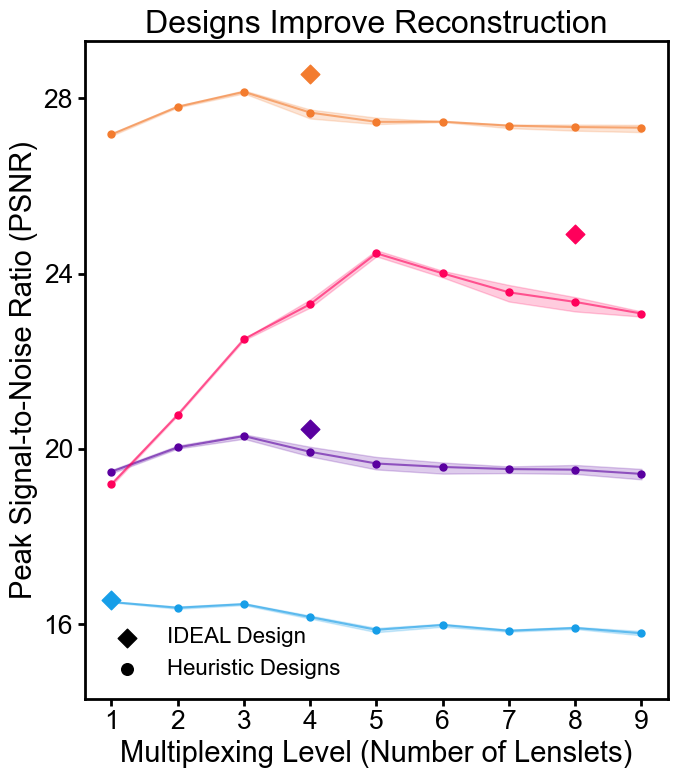

In [6]:
fig, (ax_psnr) = plt.subplots(1, 1, figsize=(7, 8), sharex=True)

for idx, dataset in enumerate(dataset_list):
    psfs_to_test   = psf_names_list + [ideal_names_list[idx]]
    lenslet_counts = num_lenslets  + [num_lenses_in_ideal_designs[idx]]
    mean_psnrs_across_psfs,  lower_psnrs_across_psfs,  upper_psnrs_across_psfs  = [], [], []
    mean_mses_across_psfs,   lower_mses_across_psfs,   upper_mses_across_psfs   = [], [], []

    for psf_name in psfs_to_test:
        reconstruction_best_epochs = []
        reconstruction_total_epochs = []
        reconstruction_psnrs = []
        reconstruction_mses  = []

        for seed_value in seed_list:
            logs = np.load(
                reconstruction_dir + "{}_{}_psf_{}_model_{}_lr_{}_batch_{}_epoch_max_{}_recon_logs.npy".format(
                    dataset, psf_name, model_type, lr_value, batch_size, max_epochs, seed_value
                )
            )
            total_epochs = logs.shape[1]
            reconstruction_total_epochs.append(total_epochs)

            # metrics are: test loss, psnr, mse, best epoch
            final_metrics = np.load(
                reconstruction_dir + "{}_{}_psf_{}_model_{}_lr_{}_batch_{}_epoch_max_{}_final_metrics.npy".format(
                    dataset, psf_name, model_type, lr_value, batch_size, max_epochs, seed_value
                )
            )
            test_loss, psnr, mse, best_epoch = final_metrics
            reconstruction_psnrs.append(psnr)
            reconstruction_mses.append(mse)
            reconstruction_best_epochs.append(best_epoch)

        if np.max(reconstruction_total_epochs) > 190:
            print("for psf {}, the reconstruction took too long and didn't converge.".format(psf_name))

        reconstruction_best_epochs  = np.array(reconstruction_best_epochs)
        reconstruction_psnrs        = np.array(reconstruction_psnrs)
        reconstruction_mses         = np.array(reconstruction_mses)
        reconstruction_total_epochs = np.array(reconstruction_total_epochs)

        psnr_lower, psnr_upper, psnr_mean = confidence_interval_list(reconstruction_psnrs)
        mse_lower,  mse_upper,  mse_mean  = confidence_interval_list(reconstruction_mses)

        mean_psnrs_across_psfs.append(psnr_mean)
        lower_psnrs_across_psfs.append(psnr_lower)
        upper_psnrs_across_psfs.append(psnr_upper)

        mean_mses_across_psfs.append(mse_mean)
        lower_mses_across_psfs.append(mse_lower)
        upper_mses_across_psfs.append(mse_upper)

    # Convert to arrays for indexing
    mean_psnrs_across_psfs  = np.array(mean_psnrs_across_psfs)
    lower_psnrs_across_psfs = np.array(lower_psnrs_across_psfs)
    upper_psnrs_across_psfs = np.array(upper_psnrs_across_psfs)

    mean_mses_across_psfs   = np.array(mean_mses_across_psfs)
    lower_mses_across_psfs  = np.array(lower_mses_across_psfs)
    upper_mses_across_psfs  = np.array(upper_mses_across_psfs)

    # ====== PSNR subplot ======
    ax_psnr.scatter(lenslet_counts[-1], mean_psnrs_across_psfs[-1],
                    color=colors_to_use[idx], marker=random_init_optimum_symbol,
                    s=random_init_optimum_symbol_size, zorder=2)

    ax_psnr.plot(lenslet_counts[:-1], mean_psnrs_across_psfs[:-1],
                 label="{}, lr={}".format(dataset, lr_value),
                 color=colors_to_use[idx], zorder=1, alpha=0.6)

    ax_psnr.scatter(lenslet_counts[:-1], mean_psnrs_across_psfs[:-1],
                    color=colors_to_use[idx], marker='o', s=25, zorder=0)

    ax_psnr.fill_between(lenslet_counts[:-1],
                         lower_psnrs_across_psfs[:-1], upper_psnrs_across_psfs[:-1],
                         color=colors_to_use[idx], alpha=0.2, zorder=1)

    print("dataset {} mean PSNRS are: ".format(dataset), mean_psnrs_across_psfs)
    print("dataset {} mean MSES are: ".format(dataset),  mean_mses_across_psfs)

ax_psnr.set_xticks([1,2,3,4,5,6,7,8,9])
ax_psnr.set_xticklabels([str(i) for i in range(1,10)], size=tick_fontsize)
ax_psnr.set_xlabel("Multiplexing Level (Number of Lenslets)", size=axis_label_fontsize)
ax_psnr.set_ylabel("Peak Signal-to-Noise Ratio (PSNR)", size=axis_label_fontsize)
ax_psnr.set_yticks([16, 20, 24, 28])
ax_psnr.set_yticklabels([str(i) for i in [16, 20, 24, 28]], size=tick_fontsize)
ax_psnr.set_ylim([14.3, 29.3])
ax_psnr.set_title("Designs Improve Reconstruction", size=title_fontsize)  # replace this title in illustrator

# Build custom legend handles
random_init_handle    = ax_psnr.scatter([], [], color='black', marker=random_init_optimum_symbol,
                                       s=random_init_optimum_symbol_size, label='IDEAL Design')
heuristic_init_handle = ax_psnr.scatter([], [], color='black', marker=heuristic_init_optimum_symbol,
                                       s=heuristic_init_optimum_symbol_size, label='Design With Heuristic Initialization')
heuristic_handle      = ax_psnr.scatter([], [], color='black', marker='o',
                                       s=best_heuristic_init_symbol_size, label='Heuristic Designs')
ideal_design_handle   = ax_psnr.scatter([], [], color='black', marker=random_init_symbol,
                                       s=random_init_symbol_size, label='Random Initialization')

custom_handles = [random_init_handle, heuristic_handle]
custom_labels  = [h.get_label() for h in custom_handles]

handles_ax, labels_ax = ax_psnr.get_legend_handles_labels()
mi_handles = [h for h, l in zip(handles_ax, labels_ax) if l in dataset_names_nice]
custom_handles += mi_handles
custom_labels  += dataset_names_nice

ax_psnr.legend(custom_handles, custom_labels,
              fontsize=legend_fontsize, frameon=False, loc='lower left')

plt.tight_layout()
plt.savefig(figure_folder + 'IDEAL_recon_all_lenslets_unet_psnr_mse.pdf',
             bbox_inches='tight', transparent=True)
plt.show()

## Figure S8e Plot

dataset cifar10 mean PSNRS are:  [16.506342 16.374134 16.457478 16.161158 15.870962 15.981326 15.849208
 15.913338 15.79153  16.555943 16.693289]
dataset cifar10 mean MSES are:  [0.02237011 0.02305321 0.02261534 0.02421426 0.02588652 0.02523662
 0.0260149  0.02563445 0.02636387 0.02211065 0.02142531]
dataset fashion_mnist mean PSNRS are:  [19.478512 20.032616 20.291786 19.93265  19.66567  19.586805 19.538897
 19.525173 19.428661 20.4473   20.059366]
dataset fashion_mnist mean MSES are:  [0.01128816 0.0099369  0.00936298 0.01017    0.01081091 0.01101168
 0.01113141 0.01116619 0.01142096 0.00903297 0.00987397]
dataset mnist mean PSNRS are:  [19.192768 20.778944 22.504322 23.3021   24.46228  24.005272 23.572018
 23.352825 23.088318 24.901682 23.485245]
dataset mnist mean MSES are:  [0.01205582 0.008368   0.00562914 0.0046825  0.00358543 0.00398374
 0.00440242 0.00463291 0.00491934 0.00324049 0.00449722]
dataset bead_0.02 mean PSNRS are:  [27.17573  27.80893  28.146591 27.674423 27.462366 

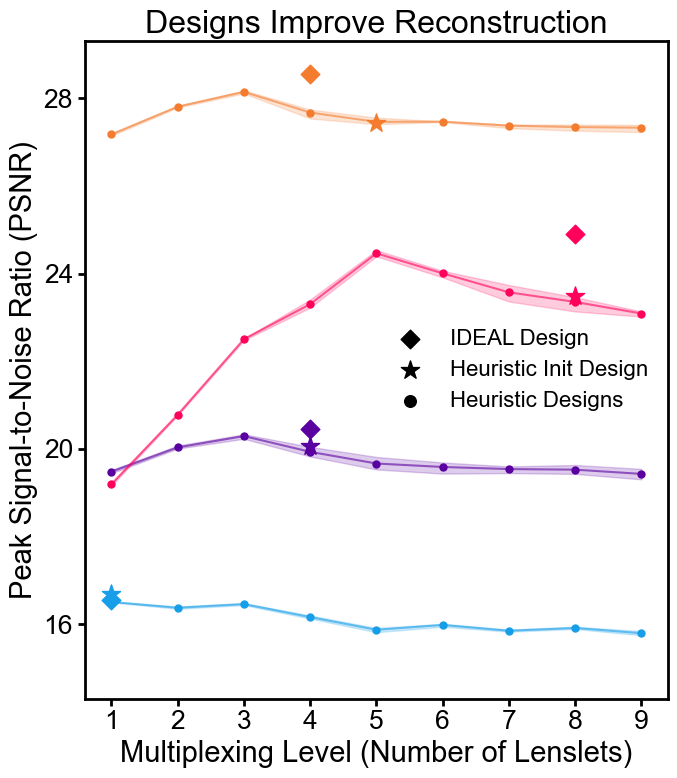

In [7]:
fig, (ax_psnr) = plt.subplots(1, 1, figsize=(7, 8), sharex=True)

for idx, dataset in enumerate(dataset_list):
    psfs_to_test   = psf_names_list + [ideal_names_list[idx], heuristic_ideal_names_list[idx]]
    lenslet_counts = num_lenslets  + [num_lenses_in_ideal_designs[idx], num_lenses_in_heuristic_ideal_designs[idx]]

    mean_psnrs_across_psfs,  lower_psnrs_across_psfs,  upper_psnrs_across_psfs  = [], [], []
    mean_mses_across_psfs,   lower_mses_across_psfs,   upper_mses_across_psfs   = [], [], []

    for psf_name in psfs_to_test:
        reconstruction_best_epochs = []
        reconstruction_total_epochs = []
        reconstruction_psnrs = []
        reconstruction_mses  = []

        for seed_value in seed_list:
            logs = np.load(
                reconstruction_dir + "{}_{}_psf_{}_model_{}_lr_{}_batch_{}_epoch_max_{}_recon_logs.npy".format(
                    dataset, psf_name, model_type, lr_value, batch_size, max_epochs, seed_value
                )
            )
            total_epochs = logs.shape[1]
            reconstruction_total_epochs.append(total_epochs)

            # metrics are: test loss, psnr, mse, best epoch
            final_metrics = np.load(
                reconstruction_dir + "{}_{}_psf_{}_model_{}_lr_{}_batch_{}_epoch_max_{}_final_metrics.npy".format(
                    dataset, psf_name, model_type, lr_value, batch_size, max_epochs, seed_value
                )
            )
            test_loss, psnr, mse, best_epoch = final_metrics
            reconstruction_psnrs.append(psnr)
            reconstruction_mses.append(mse)
            reconstruction_best_epochs.append(best_epoch)

        if np.max(reconstruction_total_epochs) > 190:
            print("for psf {}, the reconstruction took too long and didn't converge.".format(psf_name))

        reconstruction_best_epochs  = np.array(reconstruction_best_epochs)
        reconstruction_psnrs        = np.array(reconstruction_psnrs)
        reconstruction_mses         = np.array(reconstruction_mses)
        reconstruction_total_epochs = np.array(reconstruction_total_epochs)

        psnr_lower, psnr_upper, psnr_mean = confidence_interval_list(reconstruction_psnrs)
        mse_lower,  mse_upper,  mse_mean  = confidence_interval_list(reconstruction_mses)

        mean_psnrs_across_psfs.append(psnr_mean)
        lower_psnrs_across_psfs.append(psnr_lower)
        upper_psnrs_across_psfs.append(psnr_upper)

        mean_mses_across_psfs.append(mse_mean)
        lower_mses_across_psfs.append(mse_lower)
        upper_mses_across_psfs.append(mse_upper)

    # Convert to arrays for indexing
    mean_psnrs_across_psfs  = np.array(mean_psnrs_across_psfs)
    lower_psnrs_across_psfs = np.array(lower_psnrs_across_psfs)
    upper_psnrs_across_psfs = np.array(upper_psnrs_across_psfs)

    mean_mses_across_psfs   = np.array(mean_mses_across_psfs)
    lower_mses_across_psfs  = np.array(lower_mses_across_psfs)
    upper_mses_across_psfs  = np.array(upper_mses_across_psfs)

    ax_psnr.scatter(lenslet_counts[-2], mean_psnrs_across_psfs[-2], # ideal optimized one is second to last index
                    color=colors_to_use[idx], marker=random_init_optimum_symbol,
                    s=random_init_optimum_symbol_size, zorder=2)
    ax_psnr.scatter(lenslet_counts[-1], mean_psnrs_across_psfs[-1], # heuristic optimized one is last index,
                    color=colors_to_use[idx], marker=heuristic_init_optimum_symbol,
                    s=heuristic_init_optimum_symbol_size, zorder=2) 

    ax_psnr.plot(lenslet_counts[:-2], mean_psnrs_across_psfs[:-2],
                 label="{}, lr={}".format(dataset, lr_value),
                 color=colors_to_use[idx], zorder=1, alpha=0.6)

    ax_psnr.scatter(lenslet_counts[:-2], mean_psnrs_across_psfs[:-2],
                    color=colors_to_use[idx], marker='o', s=25, zorder=0)

    ax_psnr.fill_between(lenslet_counts[:-2],
                         lower_psnrs_across_psfs[:-2], upper_psnrs_across_psfs[:-2],
                         color=colors_to_use[idx], alpha=0.2, zorder=1)

    print("dataset {} mean PSNRS are: ".format(dataset), mean_psnrs_across_psfs)
    print("dataset {} mean MSES are: ".format(dataset),  mean_mses_across_psfs)

ax_psnr.set_xticks([1,2,3,4,5,6,7,8,9])
ax_psnr.set_xticklabels([str(i) for i in range(1,10)], size=tick_fontsize)
ax_psnr.set_xlabel("Multiplexing Level (Number of Lenslets)", size=axis_label_fontsize)
ax_psnr.set_ylabel("Peak Signal-to-Noise Ratio (PSNR)", size=axis_label_fontsize)
ax_psnr.set_yticks([16, 20, 24, 28])
ax_psnr.set_yticklabels([str(i) for i in [16, 20, 24, 28]], size=tick_fontsize)
ax_psnr.set_ylim([14.3, 29.3])
ax_psnr.set_title("Designs Improve Reconstruction", size=title_fontsize)

# Build custom legend handles
random_init_handle    = ax_psnr.scatter([], [], color='black', marker=random_init_optimum_symbol,
                                       s=random_init_optimum_symbol_size, label='IDEAL Design')
heuristic_init_handle = ax_psnr.scatter([], [], color='black', marker=heuristic_init_optimum_symbol,
                                       s=heuristic_init_optimum_symbol_size, label='Heuristic Init Design')
heuristic_handle      = ax_psnr.scatter([], [], color='black', marker='o',
                                       s=best_heuristic_init_symbol_size, label='Heuristic Designs')
ideal_design_handle   = ax_psnr.scatter([], [], color='black', marker=random_init_symbol,
                                       s=random_init_symbol_size, label='Random Initialization')

custom_handles = [random_init_handle, heuristic_init_handle, heuristic_handle]
custom_labels  = [h.get_label() for h in custom_handles]

handles_ax, labels_ax = ax_psnr.get_legend_handles_labels()
mi_handles = [h for h, l in zip(handles_ax, labels_ax) if l in dataset_names_nice]
custom_handles += mi_handles
custom_labels  += dataset_names_nice

ax_psnr.legend(custom_handles, custom_labels,
              fontsize=legend_fontsize, frameon=False, loc='center right')

plt.tight_layout()
plt.savefig(figure_folder + 'IDEAL_recon_all_lenslets_with_heuristic_unet_psnr.pdf',
             bbox_inches='tight', transparent=True)
plt.show()

## Load images and save objects and recons for Fig. 3b, 3c, Fig. S7

Use same process to run for heuristic designs and ideal random designs.

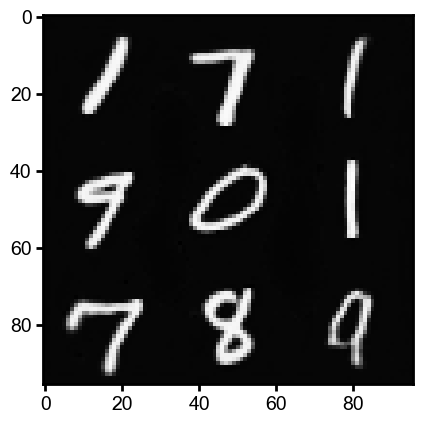

In [8]:
# Process ideal heuristic designs
for PSF, DATA in zip(['ideal_heuristic_cifar', 'ideal_heuristic_fashion', 'ideal_heuristic_mnist', 'ideal_heuristic_beads'], ['cifar10', 'fashion_mnist', 'mnist', 'bead_0.02']):
    meas_arr = np.load(f'{reconstruction_dir}{DATA}_{PSF}_psf_medium_model_0.002_lr_64_batch_200_epoch_max_4_recon_images.npy')
    for i, img in enumerate(meas_arr[0, :, :, :]):
        # meas, gt, pred
        plt.imshow(img, cmap='gray')
        plt.imsave(figure_folder + f'{DATA}_{PSF}_meas_{i}.png', img, cmap='gray')

    for i, img in enumerate(meas_arr[1, :, :, :]):
        # meas, gt, pred
        plt.imshow(img, cmap='gray')
        plt.imsave(figure_folder + f'{DATA}_{PSF}_ground_truth_{i}.png', img, cmap='gray')

    for i, img in enumerate(meas_arr[2, :, :, :]):
        # meas, gt, pred
        plt.imshow(img, cmap='gray')
        plt.imsave(figure_folder + f'{DATA}_{PSF}_recon_{i}.png', img, cmap='gray')

# Process ideal random init designs
for PSF, DATA in zip(['ideal_cifar', 'ideal_fashion', 'ideal_mnist', 'ideal_beads'], ['cifar10', 'fashion_mnist', 'mnist', 'bead_0.02']):
    meas_arr = np.load(f'{reconstruction_dir}{DATA}_{PSF}_psf_medium_model_0.002_lr_64_batch_200_epoch_max_4_recon_images.npy')
    for i, img in enumerate(meas_arr[0, :, :, :]):
        # meas, gt, pred
        plt.imshow(img, cmap='gray')
        plt.imsave(figure_folder + f'{DATA}_{PSF}_meas_{i}.png', img, cmap='gray')

    for i, img in enumerate(meas_arr[1, :, :, :]):
        # meas, gt, pred
        plt.imshow(img, cmap='gray')
        plt.imsave(figure_folder + f'{DATA}_{PSF}_ground_truth_{i}.png', img, cmap='gray')

    for i, img in enumerate(meas_arr[2, :, :, :]):
        # meas, gt, pred
        plt.imshow(img, cmap='gray')
        plt.imsave(figure_folder + f'{DATA}_{PSF}_recon_{i}.png', img, cmap='gray')

# Process cifar10 with one through nine lenslets
for PSF in ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']:
    DATA = 'cifar10'
    meas_arr = np.load(f'{reconstruction_dir}{DATA}_{PSF}_psf_medium_model_0.002_lr_64_batch_200_epoch_max_4_recon_images.npy')
    for i, img in enumerate(meas_arr[0, :, :, :]):
        # meas, gt, pred
        plt.imshow(img, cmap='gray')
        plt.imsave(figure_folder + f'{DATA}_{PSF}_meas_{i}.png', img, cmap='gray')

    for i, img in enumerate(meas_arr[1, :, :, :]):
        # meas, gt, pred
        plt.imshow(img, cmap='gray')
        plt.imsave(figure_folder + f'{DATA}_{PSF}_ground_truth_{i}.png', img, cmap='gray')

    for i, img in enumerate(meas_arr[2, :, :, :]):
        # meas, gt, pred
        plt.imshow(img, cmap='gray')
        plt.imsave(figure_folder + f'{DATA}_{PSF}_recon_{i}.png', img, cmap='gray')

# Process mnist with one through nine lenslets
for PSF in ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']:
    DATA = 'mnist'
    meas_arr = np.load(f'{reconstruction_dir}{DATA}_{PSF}_psf_medium_model_0.002_lr_64_batch_200_epoch_max_4_recon_images.npy')
    for i, img in enumerate(meas_arr[0, :, :, :]):
        # meas, gt, pred
        plt.imshow(img, cmap='gray')
        plt.imsave(figure_folder + f'{DATA}_{PSF}_meas_{i}.png', img, cmap='gray')

    for i, img in enumerate(meas_arr[1, :, :, :]):
        # meas, gt, pred
        plt.imshow(img, cmap='gray')
        plt.imsave(figure_folder + f'{DATA}_{PSF}_ground_truth_{i}.png', img, cmap='gray')

    for i, img in enumerate(meas_arr[2, :, :, :]):
        # meas, gt, pred
        plt.imshow(img, cmap='gray')
        plt.imsave(figure_folder + f'{DATA}_{PSF}_recon_{i}.png', img, cmap='gray')